In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier

In [20]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [21]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


<Axes: >

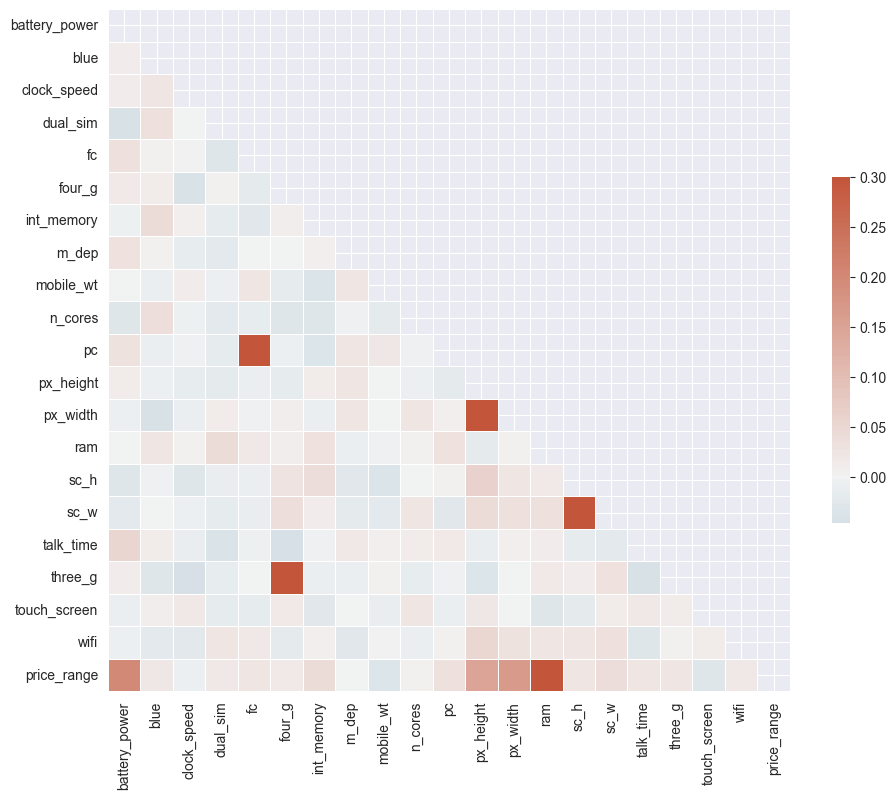

In [22]:
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [23]:
price_groups_mean = df_train.groupby('price_range').mean()
types = ["ram", "battery_power"]

type(price_groups_mean[types])


pandas.core.frame.DataFrame

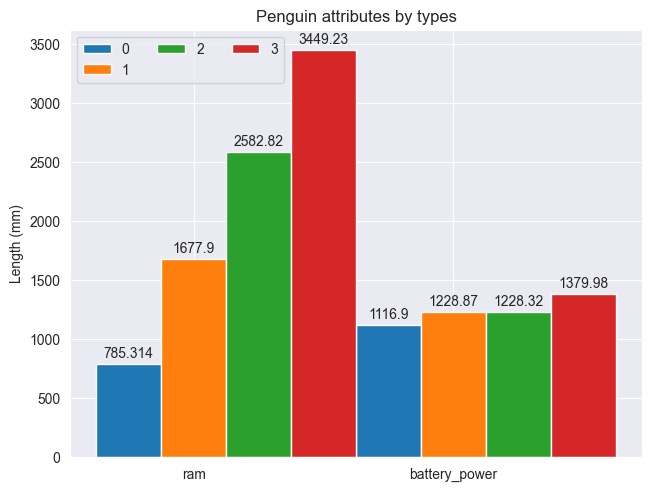

In [24]:
x = np.arange(len(types))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in price_groups_mean[types].iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by types')
ax.set_xticks(x + width, types)
ax.legend(loc='upper left', ncols=3)

plt.show()



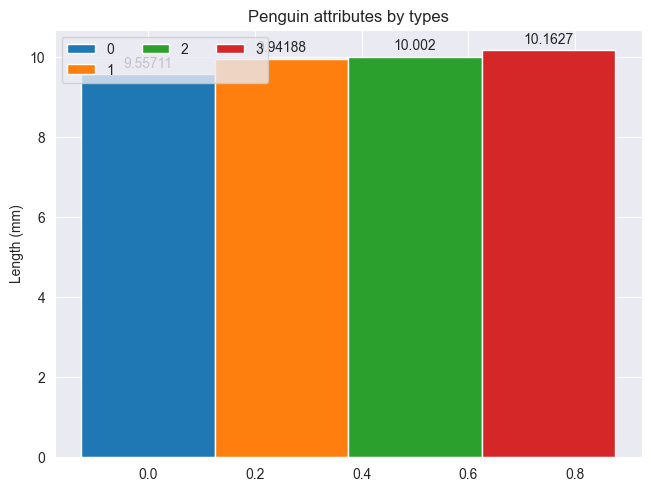

In [25]:
x = np.arange(len([0]))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in price_groups_mean[['pc']].iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by types')

ax.legend(loc='upper left', ncols=3)

plt.show()



In [26]:
price_groups_min_max = df_train.groupby('price_range').agg([min,max])
price_groups_min_max.columns = ['_'.join(x) for x in price_groups_min_max.columns.values.reshape(-1)]
price_groups_min_max

,battery_power_min,battery_power_max,blue_min,blue_max,clock_speed_min,clock_speed_max,dual_sim_min,dual_sim_max,fc_min,fc_max,...,sc_w_min,sc_w_max,talk_time_min,talk_time_max,three_g_min,three_g_max,touch_screen_min,touch_screen_max,wifi_min,wifi_max
price_range,,,,,,,,,,,,,,,,,,,,,
0,503,1994,0,1,0.5,3.0,0,1,0.0,19.0,...,0.0,18.0,2,20,0,1,0,1,0,1
1,501,1996,0,1,0.5,3.0,0,1,0.0,18.0,...,0.0,18.0,2,20,0,1,0,1,0,1
2,501,1998,0,1,0.5,3.0,0,1,0.0,18.0,...,0.0,17.0,2,20,0,1,0,1,0,1
3,503,1994,0,1,0.5,3.0,0,1,0.0,18.0,...,0.0,18.0,2,20,0,1,0,1,0,1


In [27]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [28]:
df_train.dropna()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [29]:
import warnings
warnings.filterwarnings("ignore")

features = [name for name in df_train.columns if name not in ('price_range')]
target = 'price_range'
X, y = df_train.drop('price_range',axis=1),df_train[['price_range']]
# for i in range(4,12):
#     print('The current max depth:',i ,'\n')
#     des_tree = DecisionTreeClassifier(max_depth=12)
des_tree = DecisionTreeClassifier()
des_tree.fit(X, y)
y_pred = des_tree.predict(X)
print("Confusion Matrix Tree : \n", confusion_matrix(y, y_pred),"\n")
print("The precision for Tree is ",precision_score(y, y_pred, average='micro')) 
print("The recall for Tree is ",recall_score(y, y_pred, average='micro'),"\n")  
des_tree.score(X,y)
y_test_pred = des_tree.predict(df_test.drop(['id'],axis=1).values)
y_test_predict_proba = des_tree.predict_proba(X)


Confusion Matrix Tree : 
 [[500   0   0   0]
 [  0 500   0   0]
 [  0   0 500   0]
 [  0   0   0 500]] 

The precision for Tree is  1.0
The recall for Tree is  1.0 



In [30]:
# from sklearn2pmml.pipeline import PMMLPipeline
# 
# pipeline = PMMLPipeline([
# 	("classifier", DecisionTreeClassifier())
# ])
# pipeline.fit(X, y)
# 
# from sklearn2pmml import sklearn2pmml
# 
# sklearn2pmml(pipeline, "DecisionTreeIris.pmml", with_repr = True)


In [31]:
import pickle

filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(des_tree, file)


In [32]:
# from sklearn2pmml import sklearn2pmml
# sklearn2pmml(estimator=des_tree,pmml_path= "DesClassificationTree.pmml")


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_obj = Pipeline([
 		# ("scaler",StandardScaler()),
 		("model",DecisionTreeClassifier())
 ])
pipeline_obj.fit(X,y)

from nyoka import skl_to_pmml
skl_to_pmml(pipeline=pipeline_obj,col_names=features,target_name="price_range",pmml_f_name="decision_tree.pmml")